In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('web_traffic.csv')

In [7]:
df

,VisitID,Date,UserType,Device,SessionDuration,PagesVisited
0,1,2023-07-01,New,Mobile,120,3
1,2,2023-07-02,Returning,Desktop,300,5
2,3,2023-07-03,New,Tablet,240,4
3,4,2023-07-04,Returning,Mobile,180,3
4,5,2023-07-05,New,Desktop,350,6
5,6,2023-07-06,Returning,Tablet,260,4
6,7,2023-07-07,New,Mobile,190,3
7,8,2023-07-08,Returning,Desktop,400,7
8,9,2023-07-09,New,Tablet,210,4
9,10,2023-07-10,Returning,Mobile,220,5


In [13]:
df.dtypes

VisitID             int64
Date               object
UserType           object
Device             object
SessionDuration     int64
PagesVisited        int64
dtype: object

In [15]:
date = df['Date']

In [31]:
converted = pd.to_datetime(date)

In [33]:
converted

0   2023-07-01
1   2023-07-02
2   2023-07-03
3   2023-07-04
4   2023-07-05
5   2023-07-06
6   2023-07-07
7   2023-07-08
8   2023-07-09
9   2023-07-10
Name: Date, dtype: datetime64[ns]

In [29]:
df

,VisitID,Date,UserType,Device,SessionDuration,PagesVisited
0,1,2023-07-01,New,Mobile,120,3
1,2,2023-07-02,Returning,Desktop,300,5
2,3,2023-07-03,New,Tablet,240,4
3,4,2023-07-04,Returning,Mobile,180,3
4,5,2023-07-05,New,Desktop,350,6
5,6,2023-07-06,Returning,Tablet,260,4
6,7,2023-07-07,New,Mobile,190,3
7,8,2023-07-08,Returning,Desktop,400,7
8,9,2023-07-09,New,Tablet,210,4
9,10,2023-07-10,Returning,Mobile,220,5


In [39]:
mean = df['SessionDuration'].mean()
mean

247.0

In [45]:
min = df['PagesVisited'].min()
min

3

In [49]:
max = df['SessionDuration'].max()
max

400

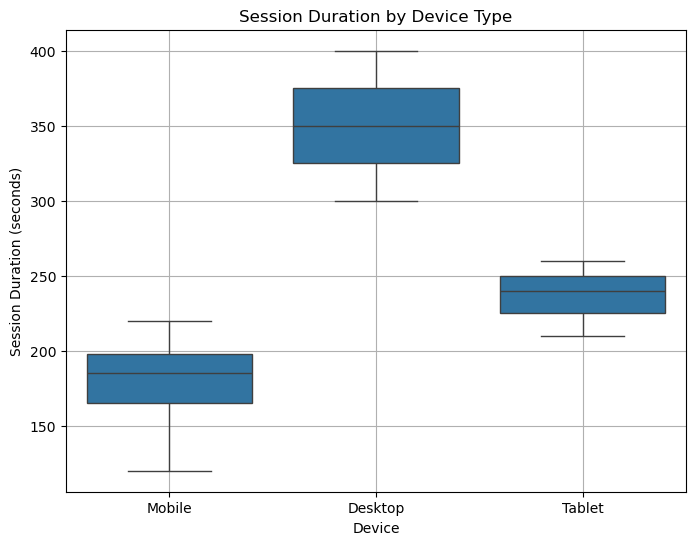

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Device', y='SessionDuration', data=df)

plt.title('Session Duration by Device Type')
plt.xlabel('Device')
plt.ylabel('Session Duration (seconds)')
plt.grid(True)
plt.show()

C:\Users\piyus\AppData\Local\Temp\ipykernel_11148\2968934981.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='UserType', y='PagesVisited', data=pages_by_user_type, palette='Set2')


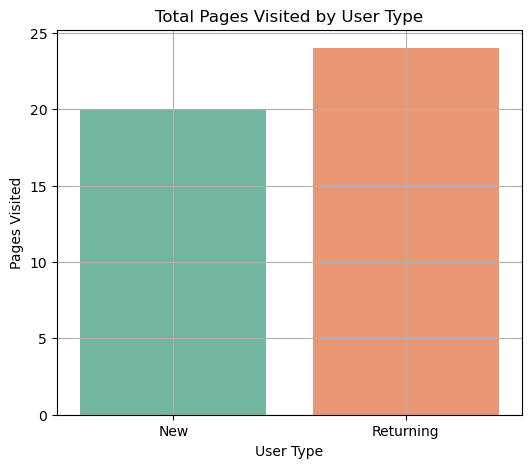

In [59]:
pages_by_user_type = df.groupby('UserType')['PagesVisited'].sum().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x='UserType', y='PagesVisited', data=pages_by_user_type, palette='Set2')

plt.title('Total Pages Visited by User Type')
plt.xlabel('User Type')
plt.ylabel('Pages Visited')
plt.grid(True)
plt.show()

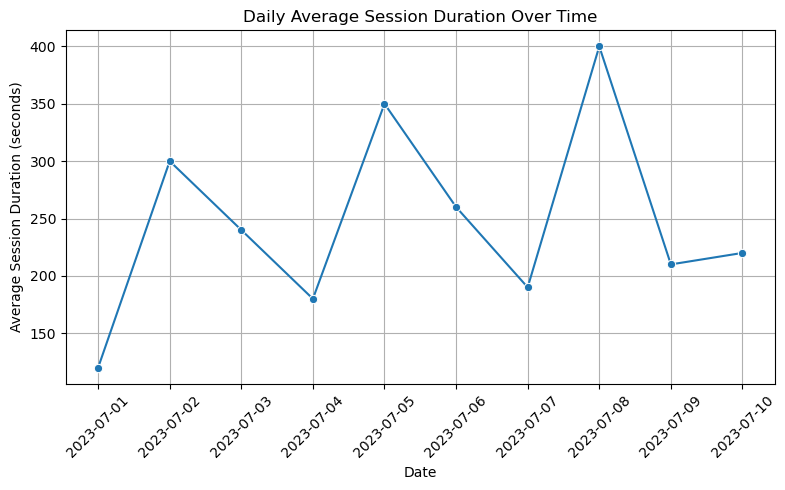

In [61]:
daily_avg = df.groupby('Date')['SessionDuration'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x='Date', y='SessionDuration', data=daily_avg, marker='o')

plt.title('Daily Average Session Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Average Session Duration (seconds)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

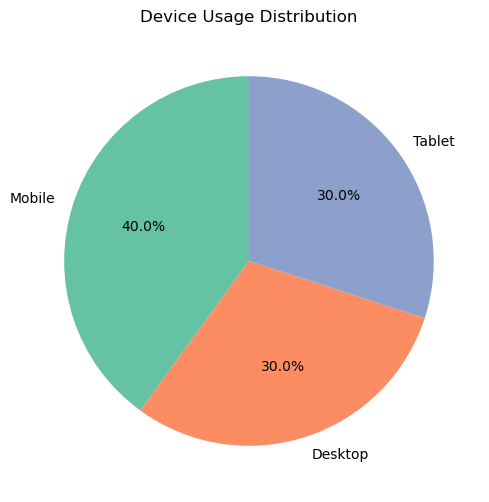

In [63]:
# Group by Device and count visits
device_counts = df['Device'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
device_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))

plt.title('Device Usage Distribution')
plt.ylabel('')
plt.show()


C:\Users\piyus\AppData\Local\Temp\ipykernel_11148\2363191242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Device', y='PagesVisited', data=avg_pages, palette='Set3')


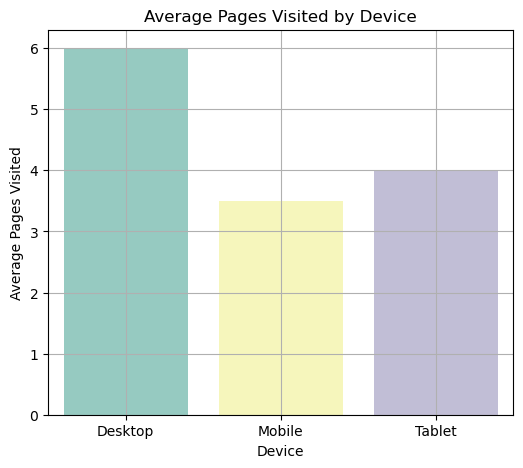

In [65]:
# Group by Device and calculate average pages
avg_pages = df.groupby('Device')['PagesVisited'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(6, 5))
sns.barplot(x='Device', y='PagesVisited', data=avg_pages, palette='Set3')

plt.title('Average Pages Visited by Device')
plt.xlabel('Device')
plt.ylabel('Average Pages Visited')
plt.grid(True)
plt.show()


Top Peak Traffic Days:
        Date  VisitCount
0 2023-07-01           1
1 2023-07-02           1
2 2023-07-03           1
3 2023-07-04           1
4 2023-07-05           1


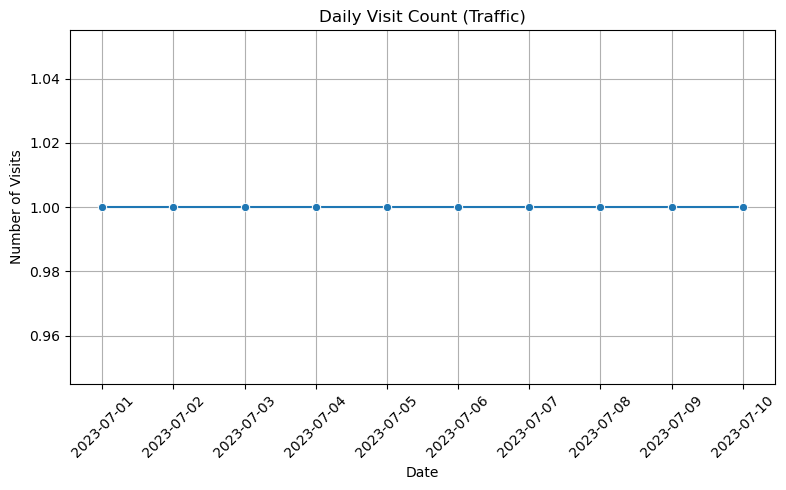

In [67]:
# Convert date column (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and count number of visits
daily_visits = df.groupby('Date').size().reset_index(name='VisitCount')

# Sort to get peak days
peak_days = daily_visits.sort_values(by='VisitCount', ascending=False)

# Display top 5 peak traffic days
print("Top Peak Traffic Days:")
print(peak_days.head())

# Optional: plot line chart of traffic
plt.figure(figsize=(8, 5))
sns.lineplot(x='Date', y='VisitCount', data=daily_visits, marker='o')

plt.title('Daily Visit Count (Traffic)')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## 🔍 Summary of Insights

### 📱 Device Performance
- **Desktop users** had the highest average session duration and pages visited.
- **Mobile** had the most users, but lower engagement.
- **Tablet** usage was moderate in both traffic and session time.

### 👥 User Engagement
- **Returning users** visited more pages on average, indicating higher engagement.
- **New users** had shorter sessions and fewer page views.

### 📈 Trends Over Time
- Session duration showed an **upward trend over time**, suggesting improving content or user experience.
- **Peak traffic days** often align with mid-week dates — possible marketing campaigns or content releases.
